### < CSCN8010-24s-Sec1 >
### Foundations of Machine Learning

## Practice Lab2


<h3> Professor: Urvi Palvankar<br><br>
Name: AeKyung Yang<br><br>
ID: 8978373</h3>

### Data Visualizations and Publication using Github Pages

###  Create a Notebook with Markdown and Graphs

(4 points out of 6)

1. Create at least 4 graphs using either `Matplotlib`, `Seaborn` or `Plotly` (or a combination of these). You can use the examples provided in the Galleries that these packages provides (links appear in our presentation about visualizations)
2. Add Markdown text, with a headline, that provides a very brief overview of the graphs (e.g. one sentence for each). Feel free to add additional Markdown elements (links, tables, images) if you like (this is not necessary for having a perfect grade, but will demonstrate a wider visualization toolset, that you could use for presenting your future analyses).
3. Push the notebook to your lab-submission fork, and create a PR

### Publish the notebook to Github repository

(2 points out of 6)

1. Push the above created file under your student id folder

### Dataset
#### Filename: framingham.csv
##### Background: 
<p>WHO studied about deaths by cardio vascular disease in US and other developed countries. They intend to anaysis and predict risk factors of heart disease. This dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.</p>

##### Description
<ul>
    <li>Purpose: hear disease prediction by logistic regression</li>
    <li>Each attribute is a potential risk factor</li>
    <li> 4,000 records and 15 attributes</li>
    <li>Reference: Dileep, 2019, V1, https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset/data</li>
</ul>


| Attribute | Factor | Desription |
|:----------|:------|:----------|
| Sex | Demographic | Female or Male |
|  Age      ||Age of the patient|
| Education| | |
| Current Smoker | Behavioral       |  whether or not the patient is a current smoker |
|Cigs Per Day| Behavioral | the number of cigarettes that the person smoked on average in one day|
|BP Meds | Medical(history) | whether or not the patient was on blood pressure medication|
|Prevalent Stroke||whether or not the patient had previously had a stroke|
|Prevalent Hyp||whether or not the patient was hypertensive|
|Diabetes|| whether or not the patient had diabetes|
|Tot Chol|Medial(current)|total cholesterol level |
|Sys BP||systolic blood pressure|
|Dia BP|| diastolic blood pressure|
|BMI|| Body Mass Index|
|Heart Rate|| heart rate |
|Glucose|| glucose level|
|Predict Value|binary:"1" means "Yes","0" means "No"|10 year risk of coronary heart disease CHD ”|

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
# dataset loading
hrdata = pd.read_csv('framingham.csv')

In [21]:
# 5 rows
hrdata.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### 1. BMI and Heart Rate as age

Text(0.5, 1.0, 'Heart Disease Features: Age vs Heart Rate')

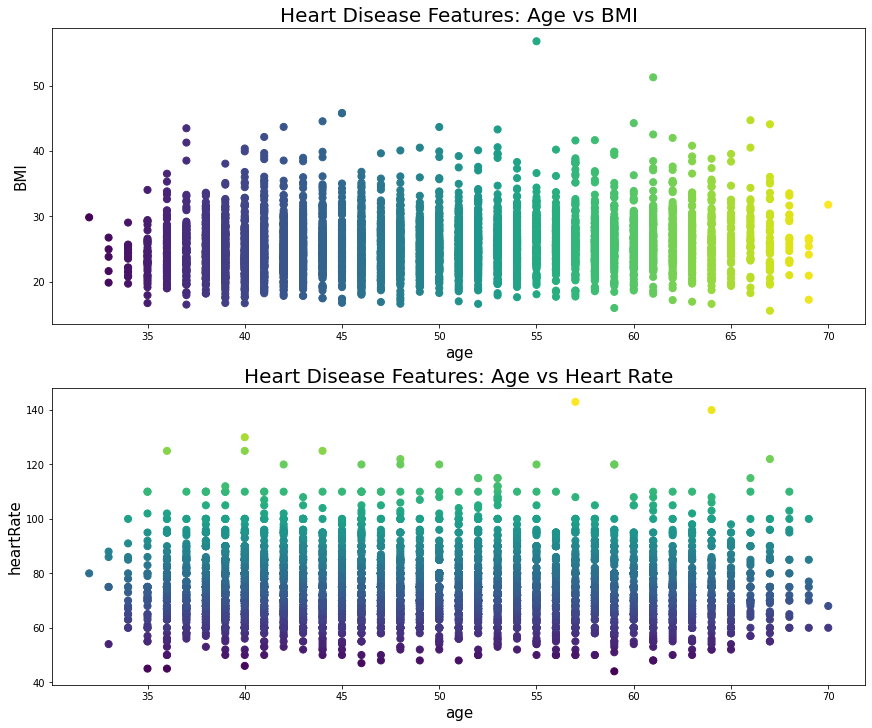

In [118]:
# set figure and ax 
fig, axs = plt.subplots(2,1,figsize=(12,10),layout='constrained')

axs[0].scatter('age', 'BMI', c='age', s=50,data=hrdata)
axs[1].scatter('age', 'heartRate', c='heartRate', s=50,data=hrdata)

axs[0].set_xlabel("age", fontsize=15)
axs[0].set_ylabel('BMI', fontsize=15)
axs[0].set_title('Heart Disease Features: Age vs BMI', fontsize=20)

axs[1].set_xlabel("age", fontsize=15)
axs[1].set_ylabel('heartRate', fontsize=15)
axs[1].set_title('Heart Disease Features: Age vs Heart Rate', fontsize=20)

### 2. Heart rate and Age

#### Heart Rate Histogram
The biggest heart rate is about 70 for approximately 600 people.

#### Age Histogram
The average age is about 40.

<AxesSubplot:xlabel='age', ylabel='Count'>

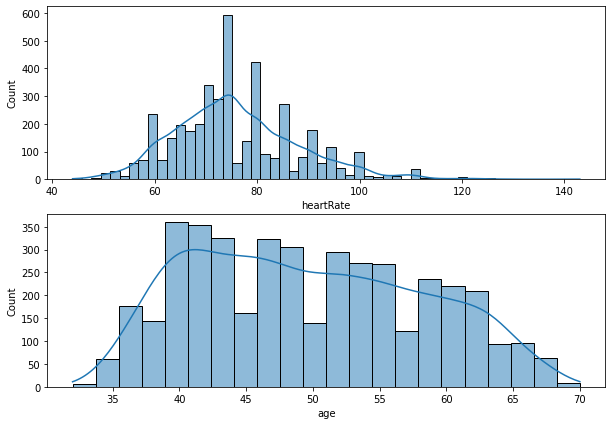

In [150]:
fig,axes = plt.subplots(2,1,figsize=(10,7))
hr = hrdata['heartRate']

# heart rate
sns.histplot(data=hr, kde=True, ax=axes[0])

# age
sns.histplot(data=hrdata['age'], kde=True, ax=axes[1])

### 3. 10 year heart disease risk by age

Text(70, 0.033, '59-year')

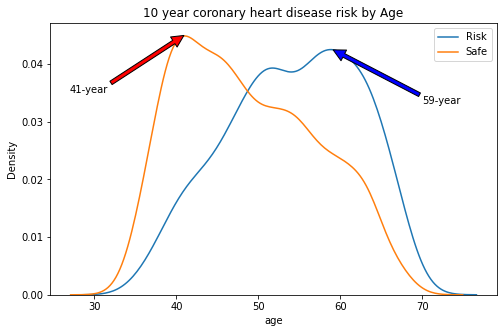

In [185]:
risk = hrdata[hrdata['TenYearCHD'] == 1]
safe = hrdata[hrdata['TenYearCHD'] == 0]

fig, ax = plt.subplots(figsize=(8, 5))
sns.kdeplot(risk['age'],ax=ax, label='Risk')
sns.kdeplot(safe['age'],ax=ax, label='Safe')

ax.set_title('10 year coronary heart disease risk by Age')
ax.legend()

ax.annotate('41-year', xy=(41,0.045), xytext=(27,0.035),
            arrowprops=dict(facecolor='red', shrink=0.01))

ax.annotate('59-year', xy=(59,0.0425), xytext=(70,0.033),
            arrowprops=dict(facecolor='blue', shrink=0.01))

### 4. 10 year coronary heart disease risk by gender

Text(0.5, 0, 'gender')

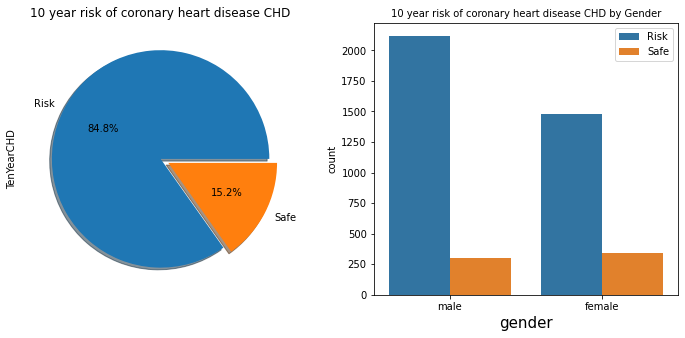

In [138]:
fig, axes = plt.subplots(1,2, figsize=(12,5))  # Create a figure containing a single axes.

labels = ['Risk','Safe']
hrdata['TenYearCHD'].value_counts().plot.pie(explode=[0, 0.08], 
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels,
                                            ax=axes[0])
axes[0].set_title("10 year risk of coronary heart disease CHD")


axes[1].set_title('10 year risk of coronary heart disease CHD by Gender',fontsize=10)
sns.countplot(x="male", hue="TenYearCHD", data=hrdata,ax=axes[1])
axes[1].legend(labels = ['Risk', 'Safe'])
axes[1].set_xticks([0,1],['male','female'],fontsize=10)
axes[1].set_xlabel('gender',fontsize=15)

### End of Lab 2